In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from network_tools import create_network, create_encoders, save_trained_network, load_trained_network
from iris_data_tools import read_iris_data, normalize_iris_data
from training_tools import train_all
from test_tools import predict

from plotting_tools import plot_acc

iris_data_location = '../Data/Iris/iris.data'

average steady state t = 46.2


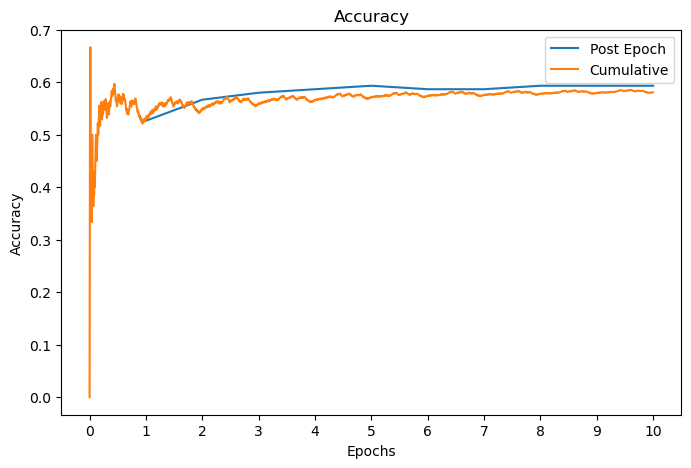

62.0 % Accuracy of saved model


In [9]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location, shuffle=True)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

#  create network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

encoders = create_encoders(attributes)

neurons = create_network(n_neurons, n_synapses)

# create dpe weights
dpe_weights = np.random.rand(n_neurons, len(classes))

n_epochs = 10
window_size = 10
sim_time = 100

E_t, avg_ss, c_acc = train_all(normalized_iris_data, labels, classes, neurons, encoders, dpe_weights, sim_time=sim_time, window_size=window_size, n_epochs=n_epochs)

print(f'average steady state t = {avg_ss}')

plot_acc(E_t, c_acc)

correct = 0
saved_correct = 0
for d, l in zip(normalized_iris_data, labels):
    y2 = predict(neurons, encoders, dpe_weights, d, sim_time=sim_time, window_size=window_size)

    
    if np.argmax(y2) == l:
        saved_correct += 1

print(f'{((saved_correct / len(normalized_iris_data))*100):.1f} % Accuracy of saved model')

In [10]:
save_trained_network('test_network.json', neurons, encoders, dpe_weights, window_size, sim_time, c_acc, E_t, avg_ss)

In [11]:
loaded_neurons, loaded_encoders, loaded_dpe_weights, loaded_window_size, loaded_sim_time, loaded_c_acc, loaded_E_t, loaded_avg_ss = load_trained_network('test_network.json')

correct = 0
saved_correct = 0
for d, l in zip(normalized_iris_data, labels):
    y1 = predict(loaded_neurons, loaded_encoders, loaded_dpe_weights, d, sim_time=loaded_sim_time, window_size=loaded_window_size)
    y2 = predict(neurons, encoders, dpe_weights, d, sim_time=sim_time, window_size=window_size)

    # print(l)
    # print(y)
    if np.argmax(y1) == l:
        correct += 1

    if np.argmax(y2) == l:
        saved_correct += 1

print(f'{((correct / len(normalized_iris_data))*100):.1f} % Accuracy of loaded model')
print(f'{((saved_correct / len(normalized_iris_data))*100):.1f} % Accuracy of saved model')

62.0 % Accuracy of loaded model
62.0 % Accuracy of saved model
